In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

In [72]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [73]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [74]:
combined_data = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
# Checking the number of mice.
unique_counts = combined_data["Mouse ID"].unique()

# check for duplicated Timepoint
len(unique_counts)

249

In [76]:
unique_counts = combined_data["Mouse ID"].value_counts()
unique_counts

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [77]:
# to count the values of the unique duplicated value.. and then use value_count to the boolean value
duplicatess = combined_data.duplicated(subset=["Mouse ID","Timepoint"], keep='first')

# since the keep parameter is ‘first’, hence whenever the Timepoint is occurred, the first one is considered Unique and res Duplicate

duplicatess.value_counts()
#combined_data[duplicatess]

False    1888
True        5
dtype: int64

In [78]:
# Show all the data for the duplicate mouse ID using .duplicated()
combined_data[duplicatess]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [79]:
# To filter rows containing only mouse ID == "g989". using .isin([]) will let us see the duplicates Timepoint
single_ID = combined_data["Mouse ID"].isin(["g989"])
combined_data[single_ID]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [80]:
# create a clean Dataframe by dropping the duplicate mouse by its ID
#Since the duplicated() method returns True for Duplicates, the NOT(~) of the series is taken to see unique value in Data Frame.
clean_dataframe = combined_data[~duplicatess]
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [81]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_dataframe["Mouse ID"].nunique()
mice_count

249

# Summary Statistics

In [82]:
count_mice = clean_dataframe.groupby('Drug Regimen')['Mouse ID'].count()
count_mice

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean":mean, "Median":median, "Variance":var, "Standard Deviation":std, 
                           "SEM":sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# Using the aggregation method, produce the same summary statistics in a single line
clean_dataframe[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').aggregate(['mean', 'median', 'var', 'std', 'sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [85]:
clean_dataframe["Tumor Volume (mm3)"].std()

8.904564978362579

In [86]:
clean_dataframe["Tumor Volume (mm3)"].sem()

0.2049329125626731

# Pie and Bar charts

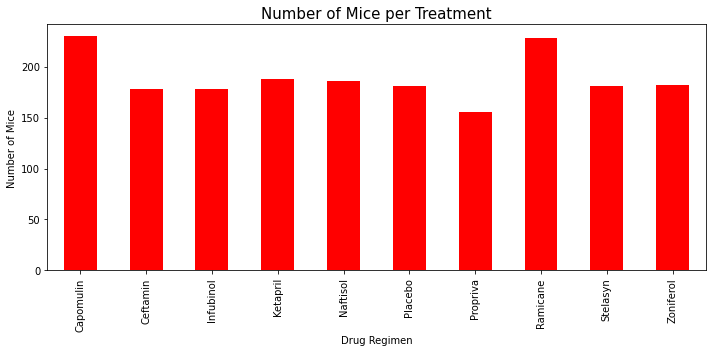

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plotting_value = clean_dataframe.groupby(['Drug Regimen']).count()["Mouse ID"]

plot_bar = plotting_value.plot(kind='bar',figsize=(10,5), color='r',fontsize = 10)

plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice",fontsize = 10)
plt.title("Number of Mice per Treatment",fontsize = 15)

plt.savefig("../Images/Pan_mice_per_treat.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

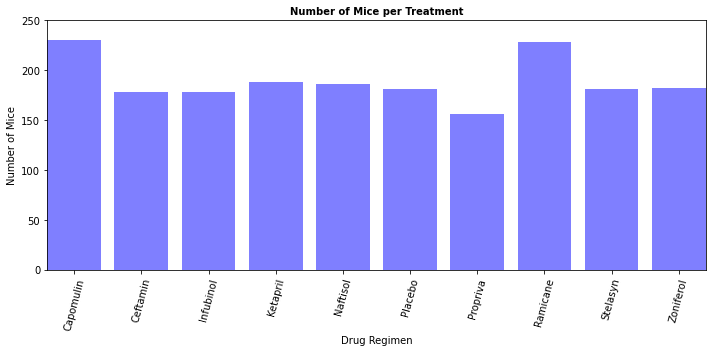

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(plotting_value))
y_axis =  plotting_value

label = list(plotting_value.index.values)
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color ='blue', alpha=0.5, align="center")
plt.xticks(tick_locations,label, rotation="75", fontsize = 10)

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, 250)

# Set a Title and labels
plt.title("Number of Mice per Treatment",fontsize=10, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("Number of Mice",fontsize=10)
plt.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()

plt.savefig("../Images/Number_mice_per_treat.png", bbox_inches = "tight")


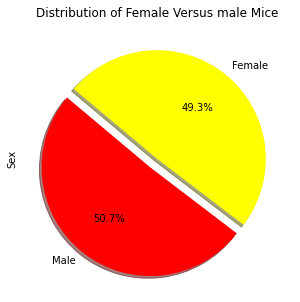

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plotting_sex = clean_dataframe['Sex'].value_counts()

colors = ['red', 'yellow']
explode = (0.1, 0)
label = ['Female', 'Male']
plt.title('Distribution of Female Versus male Mice')
plotting_sex.plot(kind='pie',  autopct= "%1.1f%%", figsize=(10,5), colors = colors, startangle=140, 
                  explode = explode, shadow = True,)

plt.savefig("../Images/distribution_pandas.png", bbox_inches = "tight")
plt.show()

Male      958
Female    930
Name: Sex, dtype: int64

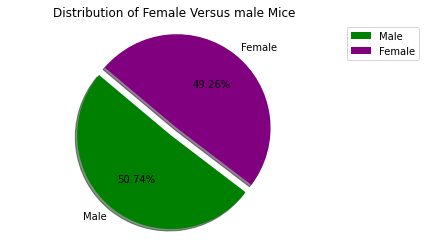

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plotting_sex = clean_dataframe['Sex'].value_counts()
explode =(0.1, 0)
colors= ['green','purple']
labels = list(plotting_sex.index)

plt.pie(plotting_sex,explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=140)

plt.title('Distribution of Female Versus male Mice')

plt.legend(labels, loc='best',frameon=True, bbox_to_anchor=(1, 1) )
plt.axis("equal")
plotting_sex 

In [65]:
plt.savefig("../Images/distribution_female_male_mice_pandas.png", bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

# Boxplots, Outliers and Quartiles 

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_dataframe.groupby(['Mouse ID'])['Timepoint'].max()
greatest_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [67]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(greatest_timepoint,clean_dataframe, on=(['Mouse ID','Timepoint']), how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [68]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = [] 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    merged_regimen = merged_data.loc[merged_data["Drug Regimen"] == treatment]
    tumor_volume = merged_regimen['Tumor Volume (mm3)']
    
#append tumor data to new list 
    tumor_volume_data.append(tumor_volume)
    
    # add subset 

    # Determine outliers using upper and lower bounds

In [69]:
tumor_volume_data

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 81     47.685963
 84     37.311846
 86     38.125164
 88     38.753265
 109    41.483008
 116    38.846876
 122    28.430964
 125    33.329098
 163    46.539206
 164    32.377357
 170    41.581521
 175    23.343598
 181    40.728578
 184    34.455298
 193    31.023923
 205    40.658124
 209    39.952347
 221    36.041047
 227    28.484033
 240    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 77     33.562402
 78     36.374510
 92     31.560470
 94     36.134852
 97     22.050126
 120    30.564625
 127    31.095335
 158    45.220869
 159    36.561652
 167    37.225650
 169    43.419381
 178    30.276232
 191    40.667713
 218    43.166373
 236    44.183451
 245    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [89]:
quartile1

NameError: name 'quartile1' is not defined